In [2]:
import re
import pandas as pd

In [3]:
f = open('WhatsApp Chat with Maalkhor modnas.txt','r',encoding='utf-8')

In [4]:
data=f.read()

In [5]:
print(data)

20/12/2018, 23:32 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
20/12/2018, 21:13 - Riddhideep created group "Kal Kolaghat"
20/12/2018, 21:13 - Riddhideep added you
20/12/2018, 21:17 - Bindu: Ha tui ebar bol kotha theke uthte parbi
20/12/2018, 21:21 - Riddhideep: Toll tax
20/12/2018, 21:21 - Riddhideep: Etai mne hoye best hbe
20/12/2018, 21:21 - Bindu: Ha amaro tai mone hoy
20/12/2018, 21:22 - Srijato 2: Hmm
20/12/2018, 21:22 - Srijato 2: Amaro Tai mone hoy toder kotha shune
20/12/2018, 21:22 - Riddhideep: 😒
20/12/2018, 21:22 - Bindu: 😆
20/12/2018, 21:23 - Bindu: Shubhobrata kothay underground bol to🤔
20/12/2018, 21:23 - Riddhideep: Kal k keu speaker niye asis
20/12/2018, 21:23 - Riddhideep: Mosti hbe
20/12/2018, 21:23 - Srijato 2: Garite ache toh
20/12/2018, 21:23 - Srijato 2: Noyto ami geye debo
20/12/2018, 21:23 - Riddhideep: Ota i ask korte ja66ilam
20/12/2018, 21:23 - Riddhideep: Garite

In [6]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [7]:
messages = re.split(pattern, data)[1:]
len(messages)

10061

In [8]:
dates = re.findall(pattern, data)
dates

['20/12/2018, 23:32 - ',
 '20/12/2018, 21:13 - ',
 '20/12/2018, 21:13 - ',
 '20/12/2018, 21:17 - ',
 '20/12/2018, 21:21 - ',
 '20/12/2018, 21:21 - ',
 '20/12/2018, 21:21 - ',
 '20/12/2018, 21:22 - ',
 '20/12/2018, 21:22 - ',
 '20/12/2018, 21:22 - ',
 '20/12/2018, 21:22 - ',
 '20/12/2018, 21:23 - ',
 '20/12/2018, 21:23 - ',
 '20/12/2018, 21:23 - ',
 '20/12/2018, 21:23 - ',
 '20/12/2018, 21:23 - ',
 '20/12/2018, 21:23 - ',
 '20/12/2018, 21:23 - ',
 '20/12/2018, 21:24 - ',
 '20/12/2018, 21:24 - ',
 '20/12/2018, 21:24 - ',
 '20/12/2018, 21:24 - ',
 '20/12/2018, 21:24 - ',
 '20/12/2018, 21:24 - ',
 '20/12/2018, 21:24 - ',
 '20/12/2018, 21:24 - ',
 '20/12/2018, 21:25 - ',
 '20/12/2018, 21:27 - ',
 '20/12/2018, 21:27 - ',
 '20/12/2018, 21:28 - ',
 '20/12/2018, 21:28 - ',
 '20/12/2018, 21:28 - ',
 '20/12/2018, 21:28 - ',
 '20/12/2018, 21:28 - ',
 '20/12/2018, 21:28 - ',
 '20/12/2018, 21:29 - ',
 '20/12/2018, 21:29 - ',
 '20/12/2018, 21:30 - ',
 '20/12/2018, 21:30 - ',
 '20/12/2018, 21:30 - ',


In [9]:
df = pd.DataFrame({'user_message':messages,'message_date':dates})
# convert message data type
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M - ')

df.rename(columns={'message_date':'date'}, inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2018-12-20 23:32:00
1,"Riddhideep created group ""Kal Kolaghat""\n",2018-12-20 21:13:00
2,Riddhideep added you\n,2018-12-20 21:13:00
3,Bindu: Ha tui ebar bol kotha theke uthte parbi\n,2018-12-20 21:17:00
4,Riddhideep: Toll tax\n,2018-12-20 21:21:00


In [10]:
df.shape

(10061, 2)

In [11]:
# separate users and messages
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1:]:# user name
        users.append(entry[1])
        messages.append(entry[2])
        
    else:
        users.append('group_notification')
        messages.append(entry[0])
        
df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()
    

,date,user,message
0,2018-12-20 23:32:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2018-12-20 21:13:00,group_notification,"Riddhideep created group ""Kal Kolaghat""\n"
2,2018-12-20 21:13:00,group_notification,Riddhideep added you\n
3,2018-12-20 21:17:00,Bindu,Ha tui ebar bol kotha theke uthte parbi\n
4,2018-12-20 21:21:00,Riddhideep,Toll tax\n


In [12]:
df['year'] = df['date'].dt.year

In [13]:
df.head()

,date,user,message,year
0,2018-12-20 23:32:00,group_notification,Messages and calls are end-to-end encrypted. N...,2018
1,2018-12-20 21:13:00,group_notification,"Riddhideep created group ""Kal Kolaghat""\n",2018
2,2018-12-20 21:13:00,group_notification,Riddhideep added you\n,2018
3,2018-12-20 21:17:00,Bindu,Ha tui ebar bol kotha theke uthte parbi\n,2018
4,2018-12-20 21:21:00,Riddhideep,Toll tax\n,2018


In [14]:
df['month'] = df['date'].dt.month_name()

In [15]:



df['day'] = df['date'].dt.day

In [16]:
df['hour'] = df['date'].dt.hour

In [17]:
df['minute'] = df['date'].dt.minute

In [18]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2018-12-20 23:32:00,group_notification,Messages and calls are end-to-end encrypted. N...,2018,December,20,23,32
1,2018-12-20 21:13:00,group_notification,"Riddhideep created group ""Kal Kolaghat""\n",2018,December,20,21,13
2,2018-12-20 21:13:00,group_notification,Riddhideep added you\n,2018,December,20,21,13
3,2018-12-20 21:17:00,Bindu,Ha tui ebar bol kotha theke uthte parbi\n,2018,December,20,21,17
4,2018-12-20 21:21:00,Riddhideep,Toll tax\n,2018,December,20,21,21


In [19]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [20]:

len(words)

45443

In [21]:
pip install urlextract

Note: you may need to restart the kernel to use updated packages.


In [22]:




from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("www.facebook.com")
urls

['www.facebook.com']

In [23]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [24]:
len(links)

403

In [25]:
x = df['user'].value_counts().head()

In [26]:


import matplotlib.pyplot as plt

In [27]:
name = x.index
count = x.values

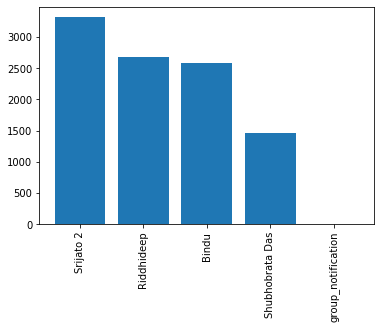

In [28]:
plt.bar(name,count)
plt.xticks(rotation = 'vertical')
plt.show()

In [29]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name' , 'user':'percent'})

,name,percent
0,Srijato 2,32.97
1,Riddhideep,26.62
2,Bindu,25.70
3,Shubhobrata Das,14.60
4,group_notification,0.11


In [30]:
temp = df[df['user'] != 'group_notification']

In [31]:
temp = temp[temp['message'] !='<Media omitted>\n']

In [32]:
f = open('stop_hinglish.txt' , 'r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [33]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [34]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,bored,1242
1,ami,249
2,kore,247
3,😂,187
4,hbe,184
5,tui,174
6,🌚,162
7,sala,157
8,@919432648634,132
9,tor,130


In [35]:
!pip install emoji

In [36]:
import emoji

In [37]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

In [38]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,🤣,1212
1,😂,1050
2,😆,390
3,🌚,248
4,🏻,221
...,...,...
104,💉,1
105,🧝,1
106,♀,1
107,😃,1


In [39]:
df['month_num'] = df['date'].dt.month

In [40]:
df

,date,user,message,year,month,day,hour,minute,month_num
0,2018-12-20 23:32:00,group_notification,Messages and calls are end-to-end encrypted. N...,2018,December,20,23,32,12
1,2018-12-20 21:13:00,group_notification,"Riddhideep created group ""Kal Kolaghat""\n",2018,December,20,21,13,12
2,2018-12-20 21:13:00,group_notification,Riddhideep added you\n,2018,December,20,21,13,12
3,2018-12-20 21:17:00,Bindu,Ha tui ebar bol kotha theke uthte parbi\n,2018,December,20,21,17,12
4,2018-12-20 21:21:00,Riddhideep,Toll tax\n,2018,December,20,21,21,12
...,...,...,...,...,...,...,...,...,...
10056,2021-07-22 11:36:00,Bindu,College update?\n,2021,July,22,11,36,7
10057,2021-07-22 11:36:00,Bindu,Joining update?\n,2021,July,22,11,36,7
10058,2021-07-22 11:36:00,Bindu,@919432648634\n,2021,July,22,11,36,7
10059,2021-07-22 11:37:00,Shubhobrata Das,Result debe e masher sese\n,2021,July,22,11,37,7


In [43]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [45]:
time = []
for i in range (timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))
    

In [47]:
timeline['time'] = time

In [48]:
timeline

,year,month_num,month,message,time
0,2018,12,December,121,December-2018
1,2019,1,January,111,January-2019
2,2019,6,June,88,June-2019
3,2019,7,July,407,July-2019
4,2019,8,August,9,August-2019
5,2019,10,October,222,October-2019
6,2019,11,November,70,November-2019
7,2019,12,December,14,December-2019
8,2020,3,March,716,March-2020
9,2020,4,April,978,April-2020


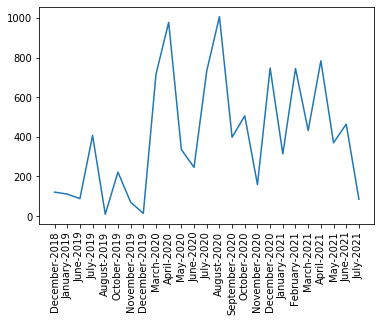

In [50]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation = 'vertical')
plt.show()

In [52]:
df['only_date'] = df['date'].dt.date

In [55]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


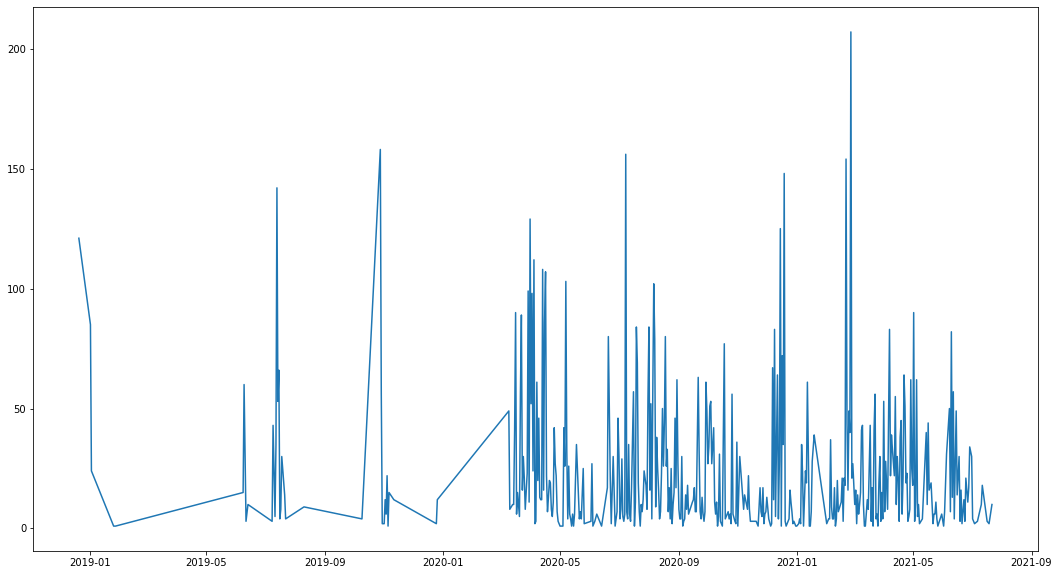

In [56]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])


In [58]:
df['day_name'] = df['date'].dt.day_name()

In [59]:
df['day_name'].value_counts()

Tuesday      1590
Thursday     1550
Monday       1547
Saturday     1500
Sunday       1363
Wednesday    1353
Friday       1158
Name: day_name, dtype: int64

In [64]:
period = []
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))
        
        

In [65]:
df['period'] = period

In [66]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
4783,2020-08-19 17:26:00,Srijato 2,Ami lyon\n,2020,August,19,17,26,8,2020-08-19,Wednesday,17-18
5465,2020-10-01 16:55:00,Riddhideep,Aaj k jombe\n,2020,October,1,16,55,10,2020-10-01,Thursday,16-17
4043,2020-07-31 23:26:00,Srijato 2,😒\n,2020,July,31,23,26,7,2020-07-31,Friday,23-00
3065,2020-05-25 23:11:00,Riddhideep,Ei toh\n😁😁\n,2020,May,25,23,11,5,2020-05-25,Monday,23-00
4160,2020-08-03 19:58:00,Shubhobrata Das,Mask duto eastbengal ar mohunbagan er\n,2020,August,3,19,58,8,2020-08-03,Monday,19-20


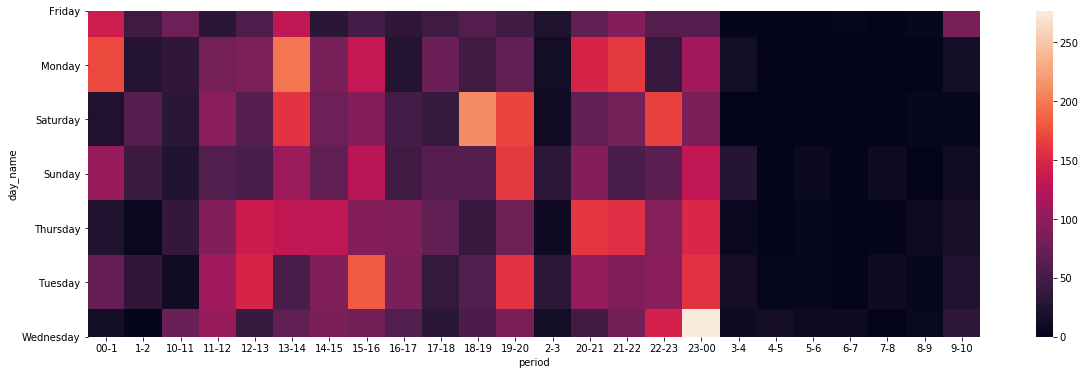

In [63]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()